In [9]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("covertype.csv")
df = df.dropna(subset=['Cover_Type'])


X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type'] - 1



In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
model = XGBClassifier(
    num_class=8,
    random_state=42,
    n_estimators=300,         # More trees
    max_depth=8,              # Deeper trees
    learning_rate=0.05,       # Smaller learning rate
    subsample=0.8,            # Avoid overfitting
    colsample_bytree=0.8,
    reg_alpha=0.3,            # L1 regularization
    reg_lambda=1.0,           # L2 regularization
    eval_metric='mlogloss'
)


scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.53432282 0.64480198 0.67326733 0.61881188 0.42574257]
Average score: 0.5793893164826687


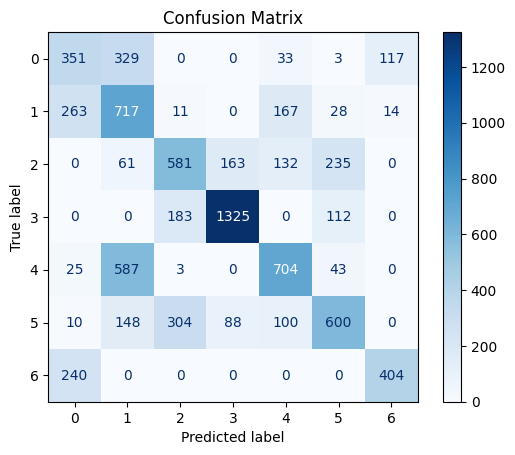

In [15]:
y_pred = cross_val_predict(model, X,y, cv=5)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

/tmp/ipython-input-7-2299121004.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


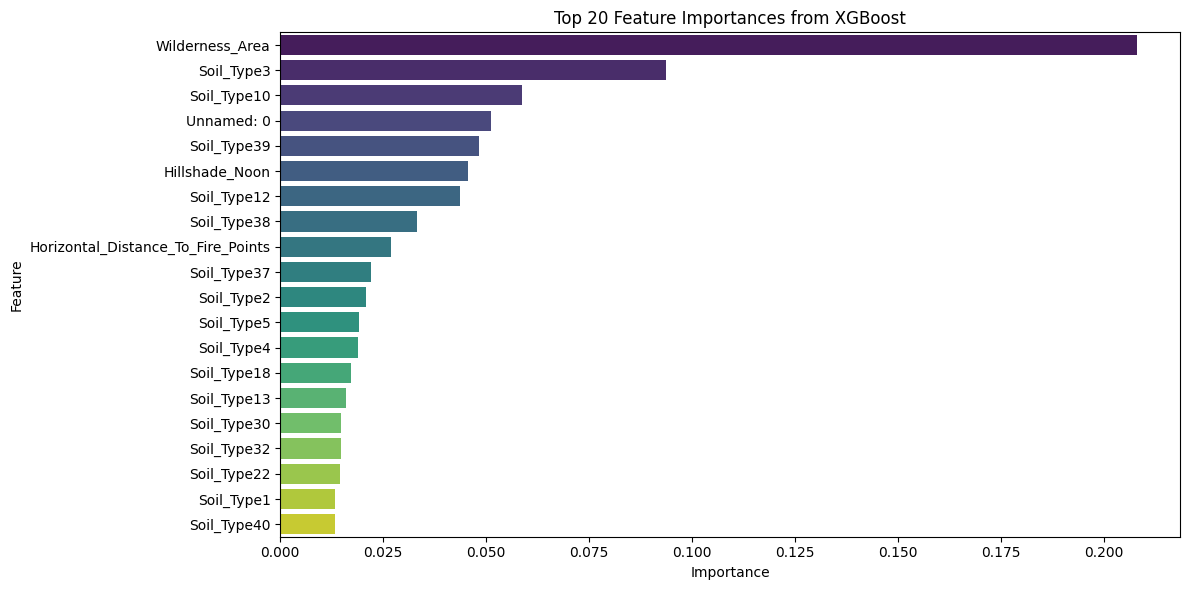

In [7]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances from XGBoost")
plt.tight_layout()
plt.show()